# Assignment 4 &emsp;&emsp; ANLY535 &emsp;&emsp; Rajkumar Dhanapal

## Code from Leacture

In [1]:
# Code using keras
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

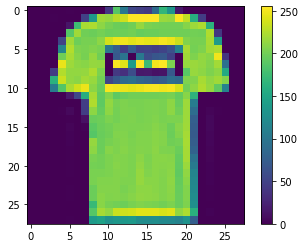

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

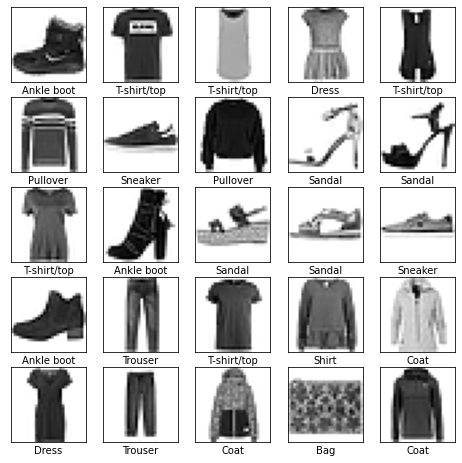

In [10]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
num_pixels = train_images.shape[1] * train_images.shape[2]   #28*28 = 784
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


Y_test = test_labels 
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(train_labels )
y_test = np_utils.to_categorical(test_labels )


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf



hidden_nodes = 128
num_classes = y_test.shape[1]

#tf.random.normal(shape=(hidden_nodes,num_pixels)
def baseline_model():
    # create model
    model = Sequential()
    #model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(num_classes,  kernel_initializer='normal',activation='softmax'))
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [12]:
model = baseline_model()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 1.8097 - accuracy: 0.4582 - val_loss: 1.2440 - val_accuracy: 0.5972
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 1.0149 - accuracy: 0.6550 - val_loss: 0.8490 - val_accuracy: 0.6933
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.7938 - accuracy: 0.7081 - val_loss: 0.7314 - val_accuracy: 0.7444
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.7041 - accuracy: 0.7489 - val_loss: 0.6702 - val_accuracy: 0.7684
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.6455 - accuracy: 0.7749 - val_loss: 0.6216 - val_accuracy: 0.7867
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.6031 - accuracy: 0.7927 - val_loss: 0.5864 - val_accuracy: 0.7977
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.5690 - accuracy: 0.8067 - val_loss: 0.5613 - val_accuracy: 0.8073
Epoch 

In [13]:
predictions = model.predict(X_test)
predictions[0]

array([2.6645755e-06, 5.7821211e-08, 3.1770523e-06, 4.1091612e-06,
       7.4737386e-07, 9.5461041e-02, 3.8077969e-06, 3.0319104e-01,
       1.2841197e-03, 6.0004926e-01], dtype=float32)

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

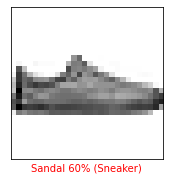

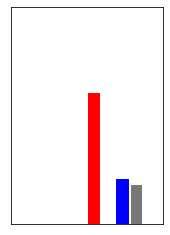

In [15]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

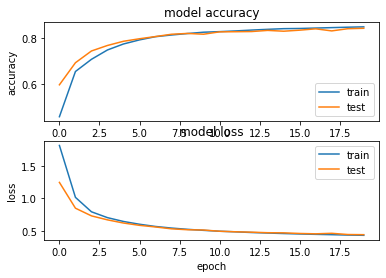

In [16]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

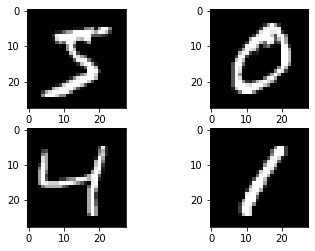

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [3]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
from keras.utils import np_utils
# one hot encode outputs
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
hidden_layer_nodes=50
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model



In [7]:
model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.0987 - val_loss: 0.1573 - val_accuracy: 0.0980
Epoch 2/10
300/300 [==============================] - 0s 948us/step - loss: 0.1360 - accuracy: 0.0987 - val_loss: 0.1208 - val_accuracy: 0.0980
Epoch 3/10
300/300 [==============================] - 0s 932us/step - loss: 0.1127 - accuracy: 0.0987 - val_loss: 0.1065 - val_accuracy: 0.0980
Epoch 4/10
300/300 [==============================] - 0s 903us/step - loss: 0.1028 - accuracy: 0.0987 - val_loss: 0.0998 - val_accuracy: 0.0980
Epoch 5/10
300/300 [==============================] - 0s 935us/step - loss: 0.0979 - accuracy: 0.1227 - val_loss: 0.0963 - val_accuracy: 0.1142
Epoch 6/10
300/300 [==============================] - 0s 915us/step - loss: 0.0952 - accuracy: 0.1125 - val_loss: 0.0943 - val_accuracy: 0.1135
Epoch 7/10
300/300 [==============================] - 0s 915us/step - loss: 0.0936 - accuracy: 0.1124 - val_loss: 0.0930 - val_accuracy: 0

In [8]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

313/313 - 0s - loss: 0.0912 - accuracy: 0.1135
Baseline Error: 88.65%
Baseline Accuracy: 11.35%


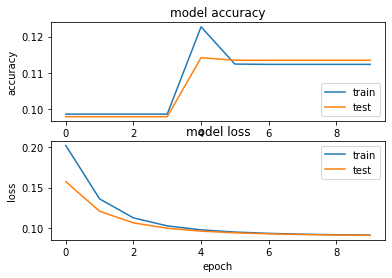

In [9]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['accuracy'])
plt.plot(nn_simple.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


In [ ]:
    # reproduced just the code
import numpy as np
predicted_classes = model.predict_classes(X_test)

    # see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

    # adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

    # plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

    # plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

## Assignment 

In [11]:
#Change the number of neurons in hidden layers to 65. See the accuracy and compared it to the baseline.
hidden_layer_nodes=65
def model_1():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

model = model_1()
# Fit the model
nn_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores_1 = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy of Model 1 is %.2f%% compared to the Baseline Accuracy of %.2f%%. It improved by %.2f%%" % (scores_1[1]*100,scores[1]*100,scores_1[1]*100-scores[1]*100 ))

Epoch 1/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.1040 - val_loss: 0.1359 - val_accuracy: 0.1027
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.1006 - val_loss: 0.1096 - val_accuracy: 0.1213
Epoch 3/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.1183 - val_loss: 0.1002 - val_accuracy: 0.1135
Epoch 4/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.1124 - val_loss: 0.0959 - val_accuracy: 0.1135
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.1124 - val_loss: 0.0937 - val_accuracy: 0.1135
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.1124 - val_loss: 0.0924 - val_accuracy: 0.1135
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 0.1124 - val_loss: 0.0917 - val_accuracy: 0.1135
Epoch 

In [12]:
#Change the number of epochs to 30 and see if it has any effect (50 neurons)
hidden_layer_nodes=50
def model_2():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

model = model_2()
# Fit the model
nn_2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)
# Final evaluation of the model
scores_2 = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy of Model 2 is %.2f%% compared to the Baseline Accuracy of %.2f%%. It improved by %.2f%%" % (scores_2[1]*100,scores[1]*100,scores_2[1]*100-scores[1]*100 ))

Epoch 1/30
300/300 [==============================] - 0s 1ms/step - loss: 0.1956 - accuracy: 0.0993 - val_loss: 0.1533 - val_accuracy: 0.1032
Epoch 2/30
300/300 [==============================] - 0s 964us/step - loss: 0.1334 - accuracy: 0.0993 - val_loss: 0.1190 - val_accuracy: 0.1032
Epoch 3/30
300/300 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.0993 - val_loss: 0.1056 - val_accuracy: 0.1032
Epoch 4/30
300/300 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.0974 - val_loss: 0.0994 - val_accuracy: 0.0950
Epoch 5/30
300/300 [==============================] - 0s 926us/step - loss: 0.0975 - accuracy: 0.0766 - val_loss: 0.0960 - val_accuracy: 0.0943
Epoch 6/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.1151 - val_loss: 0.0941 - val_accuracy: 0.1137
Epoch 7/30
300/300 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.1124 - val_loss: 0.0929 - val_accuracy: 0.1135
Ep

In [13]:
#Change the number of epochs to 30 and see if it has any effect (50 neurons)
hidden_layer_nodes=50
hidden_layer_3_nodes=20
def model_3():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_3_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    #sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model

model = model_3()
# Fit the model
nn_3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores_3 = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy of Model 3 is %.2f%% compared to the Baseline Accuracy of %.2f%%. It improved by %.2f%%" % (scores_3[1]*100,scores[1]*100,scores_3[1]*100-scores[1]*100 ))

Epoch 1/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.1124 - val_loss: 0.1891 - val_accuracy: 0.1135
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.1124 - val_loss: 0.1542 - val_accuracy: 0.1135
Epoch 3/10
300/300 [==============================] - 0s 1000us/step - loss: 0.1426 - accuracy: 0.1124 - val_loss: 0.1325 - val_accuracy: 0.1135
Epoch 4/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.1124 - val_loss: 0.1189 - val_accuracy: 0.1135
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.1124 - val_loss: 0.1102 - val_accuracy: 0.1135
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.1124 - val_loss: 0.1046 - val_accuracy: 0.1135
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.1025 - accuracy: 0.1124 - val_loss: 0.1007 - val_accuracy: 0.1135
Epo

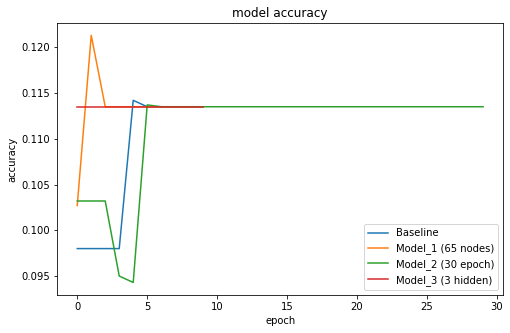

In [14]:
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(nn_simple.history['val_accuracy'])
plt.plot(nn_1.history['val_accuracy'])
plt.plot(nn_2.history['val_accuracy'])
plt.plot(nn_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Baseline', 'Model_1 (65 nodes)','Model_2 (30 epoch)','Model_3 (3 hidden)'], loc='lower right')
plt.show()